# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [59]:
# Import the appropriate libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')


# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [5]:
# Put your EDA code here
north_df.info(), south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

(None, None)

In [16]:
north_df.describe(), south_df.describe()

(       Unnamed: 0   Lost Call   Abandoned  Busy Minutes  Not Ready Minutes  \
 count  245.000000  245.000000  245.000000    245.000000         245.000000   
 mean   122.000000    0.020408    0.028571      9.987755           1.914286   
 std     70.869599    0.141681    0.166940      1.403980           0.771416   
 min      0.000000    0.000000    0.000000      8.000000           1.000000   
 25%     61.000000    0.000000    0.000000      9.000000           1.000000   
 50%    122.000000    0.000000    0.000000     10.000000           2.000000   
 75%    183.000000    0.000000    0.000000     11.000000           3.000000   
 max    244.000000    1.000000    1.000000     12.000000           3.000000   
 
        Incoming Wait Time  During Call Wait Time  Calls  
 count           82.000000             245.000000  245.0  
 mean             3.048780               2.967347    1.0  
 std              1.456382               0.843827    0.0  
 min              1.000000               2.000000  

In [14]:
#2 busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch 
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean(), south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

(Busy Minutes             9.987755
 Not Ready Minutes        1.914286
 Incoming Wait Time       3.048780
 During Call Wait Time    2.967347
 dtype: float64,
 Busy Minutes             10.054140
 Not Ready Minutes         1.910828
 Incoming Wait Time        3.000000
 During Call Wait Time     3.076433
 dtype: float64)

In [19]:
#3. 
north_df["Time Block"].describe(), south_df["Time Block"].describe()

(count          245
 unique           9
 top       12:00 PM
 freq            45
 Name: Time Block, dtype: object,
 count          314
 unique           9
 top       12:00 PM
 freq            75
 Name: Time Block, dtype: object)

In [7]:
north_df.columns, south_df.columns

(Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'),
 Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
        'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
        'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
        'During Call Wait Time', 'Calls'],
       dtype='object'))

In [21]:
north_df["Rep ID"].value_counts(), south_df["Rep ID"].value_counts()


(Brent     37
 Lilly     30
 Duke      29
 Todd      29
 Joe       26
 Xander    24
 Cam       24
 Amanda    23
 Andy      23
 Name: Rep ID, dtype: int64,
 Eric      35
 Randy     33
 Sandy     32
 Helga     31
 Kate      29
 George    29
 Karl      28
 Susan     26
 Josh      26
 Sharon    25
 Alice     20
 Name: Rep ID, dtype: int64)

In [22]:
north_df["Time Block"].value_counts(), south_df["Time Block"].value_counts()

(12:00 PM    45
 10:00 AM    43
 2:00 PM     35
 3:00 PM     30
 4:00 PM     28
 11:00 AM    25
 1:00 PM     17
 5:00 PM     17
 9:00 AM      5
 Name: Time Block, dtype: int64,
 12:00 PM    75
 10:00 AM    56
 3:00 PM     43
 11:00 AM    31
 2:00 PM     30
 5:00 PM     26
 4:00 PM     25
 1:00 PM     23
 9:00 AM      5
 Name: Time Block, dtype: int64)

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
North: 9,South: 11
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
Busy Minutes: North 9.987755, South 10.054140
Not Ready Minutes: North 1.914286, South 1.910828
Incoming Wait Time: 3.048780, South 3.000000
During Call Wait Time: North 2.967347, South 3.076433
3. What is the number of calls taken for each time block?
North: 
12:00 PM    45
 10:00 AM    43
 2:00 PM     35
 3:00 PM     30
 4:00 PM     28
 11:00 AM    25
 1:00 PM     17
 5:00 PM     17
 9:00 AM      5

South:
 12:00 PM    75
 10:00 AM    56
 3:00 PM     43
 11:00 AM    31
 2:00 PM     30
 5:00 PM     26
 4:00 PM     25
 1:00 PM     23
 9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [26]:
# Clean your data here
duplicate_rows_df = north_df[north_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape), 
duplicate_rows_df = south_df[south_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape), 

Number of duplicated rows:  (0, 15)
Number of duplicated rows:  (0, 15)


(314, 15)

In [32]:
#Missing Data?
for col in north_df.columns:
    pct_missing = np.mean(north_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100))), 
    
for col in south_df.columns:
    pct_missing = np.mean(south_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 67%
During Call Wait Time - 0%
Calls - 0%
Unnamed: 0 - 0%
Branch - 0%
Call Purpose - 0%
Time Block - 0%
Incoming or Outgoing - 0%
Queue - 0%
Rep ID - 0%
Sale - 0%
Lost Call - 0%
Abandoned - 0%
Busy Minutes - 0%
Not Ready Minutes - 0%
Incoming Wait Time - 60%
During Call Wait Time - 0%
Calls - 0%


<AxesSubplot:>

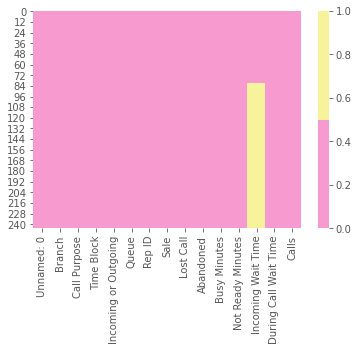

In [48]:
cols = north_df.columns[:30]
colors = ['#f79acf', '#f7f39a']
sns.heatmap(north_df[cols].isnull(), cmap = sns.color_palette(colors))

<AxesSubplot:>

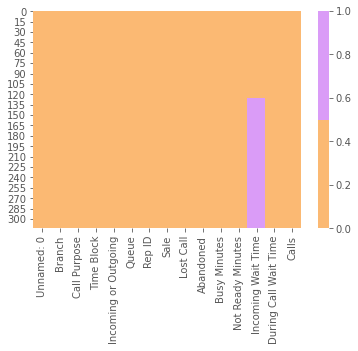

In [49]:
cols = south_df.columns[:30]
colors = ['#fbb973', '#da9cf7']
sns.heatmap(south_df[cols].isnull(), cmap = sns.color_palette(colors))

created missing indicator for: Incoming Wait Time


<AxesSubplot:xlabel='index'>

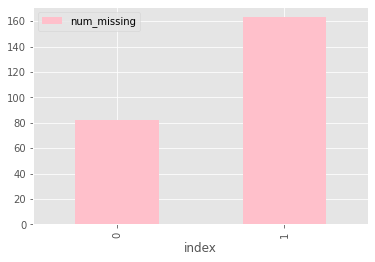

In [60]:
for col in north_df.columns:
    missing = north_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        north_df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in north_df.columns if 'ismissing' in col]
north_df['num_missing'] = north_df[ismissing_cols].sum(axis=1)

north_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing', color='pink')



In [138]:
north_df.groupby("Rep ID")["Sale"].value_counts()

Rep ID  Sale
Amanda  NO      22
        YES      1
Andy    NO      21
        YES      2
Brent   NO      36
        YES      1
Cam     NO      23
        YES      1
Duke    NO      29
Joe     NO      26
Lilly   NO      25
        YES      4
        YES      1
Todd    NO      28
        YES      1
Xander  NO      24
Name: Sale, dtype: int64

In [145]:
north_df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Time_ismissing,num_missing
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,False,0
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,False,0
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,False,0
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,False,0
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1,True,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1,True,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1,True,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1,True,1


In [139]:
south_df.groupby("Rep ID")["Sale"].value_counts()

Rep ID  Sale
Alice   NO      20
Eric    NO      35
George  NO      29
Helga   NO      31
Josh    NO      22
        YES      4
Karl    NO      26
        YES      2
Kate    NO      29
Randy   NO      33
Sandy   NO      32
Sharon  NO      25
Susan   NO      26
Name: Sale, dtype: int64

In [141]:
north_df.drop_duplicates()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Time_ismissing,num_missing
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,False,0
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,False,0
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,False,0
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,False,0
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1,True,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1,True,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1,True,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1,True,1


In [64]:
north_df.drop(columns=['Queue']), south_df.drop(columns=['Queue'])

(     Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing  \
 0             0  North        Complaint    9:00 AM             Incoming   
 1             1  North    Sales Support   11:00 AM             Incoming   
 2             2  North    Sales Support   11:00 AM             Incoming   
 3             3  North    Sales Support    4:00 PM             Incoming   
 4             4  North  Product Support   12:00 PM             Incoming   
 ..          ...    ...              ...        ...                  ...   
 240         240  North  Product Support    5:00 PM             Outgoing   
 241         241  North  Product Support    5:00 PM             Outgoing   
 242         242  North  Product Support    5:00 PM             Outgoing   
 243         243  North  Product Support    5:00 PM             Outgoing   
 244         244  North  Product Support    5:00 PM             Outgoing   
 
      Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
 0     Bre

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [ ]:
#1 No.
#2 I believe there are 2 different values based on call purpose, either product support or sales support. I just dropped the duplicate as they occurred under one Rep: Lilly.
#3: No duplicates found
#Number of duplicated rows:  (0, 15)
#Number of duplicated rows:  (0, 15)
#4 Queue, I used df.drop() to remove it.

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [71]:
# Manipulate data here
df = north_df.append(south_df, ignore_index=True)

In [80]:
north_df.groupby("Rep ID")["Calls"].value_counts(), south_df.groupby("Rep ID")["Calls"].value_counts()

(Rep ID  Calls
 Amanda  1        23
 Andy    1        23
 Brent   1        37
 Cam     1        24
 Duke    1        29
 Joe     1        26
 Lilly   1        30
 Todd    1        29
 Xander  1        24
 Name: Calls, dtype: int64,
 Rep ID  Calls
 Alice   1        20
 Eric    1        35
 George  1        29
 Helga   1        31
 Josh    1        26
 Karl    1        28
 Kate    1        29
 Randy   1        33
 Sandy   1        32
 Sharon  1        25
 Susan   1        26
 Name: Calls, dtype: int64)

In [101]:
north_df["Abandoned"].mean()

0.02857142857142857

In [102]:
x = north_df.Abandoned.mean()
x
x * 100

2.857142857142857

In [104]:
south_df["Abandoned"].mean()

0.012738853503184714

In [105]:
y = south_df.Abandoned.mean() 
y
y * 100

1.2738853503184715

In [106]:
df["Abandoned"].mean()

0.01967799642218247

In [107]:

z = df.Abandoned.mean()
z
z * 100

1.9677996422182469

In [127]:
north_df["Incoming Wait Time"].value_counts() #245


4.0    20
5.0    17
1.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [128]:
16 / 245 * 100

6.530612244897959

In [120]:
south_df["Incoming Wait Time"].value_counts(), #314

(Incoming Wait Time  Calls
 4.0                 1        30
 3.0                 1        29
 2.0                 1        28
 1.0                 1        20
 5.0                 1        19
 dtype: int64,)

In [129]:
28 / 314 * 100

8.9171974522293

In [119]:
df["Incoming Wait Time"].value_counts(), #south_df["Incoming Wait Time"].value_counts()559

(Incoming Wait Time  Calls
 4.0                 1        50
 2.0                 1        44
 3.0                 1        41
 1.0                 1        37
 5.0                 1        36
 dtype: int64,)

In [130]:
44 / 559 * 100

7.8711985688729875

In [146]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [147]:
south_df["Incoming Wait Time"].mean()

3.0

In [148]:
df["Incoming Wait Time"].mean()

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [ ]:
#1. North: Brent at 37, South: Eric at 35
#2. North: 0.02857142857142857, South: 0.012738853503184714, Entire Co.: 0.01967799642218247). Yes, the North branch.
#3. North: 6.5%, South: 8.9%, Entire Co.: 7.9%
#4. North: 3.04 seconds, South: 3.0, Entire Co.: 3.01

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [134]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [155]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

NameError: name 'north' is not defined

In [154]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

NameError: name 'purpose_group' is not defined

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [153]:
# Create your visualization here!
call_times = north_df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
